# Census Income
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

__Description of fnlwgt (final weight)__
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
#Importing Libararies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')


In [3]:
# Reading top 5 rows
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
# Reading bottom 5 rows
df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

In [4]:
print("The Shape of Datast is :",df.shape)

The Shape of Datast is : (32560, 15)


In [5]:
df.drop_duplicates(inplace=True)
print("After dropping the duplicates the Shape of Datast is :",df.shape)

After dropping the duplicates the Shape of Datast is : (32536, 15)


__With the drop_duplicates option I am getting rid of all the duplicate values present in our dataset.__<br>
__I got 14 duplicates values present in our dataset , so after deleting duplicates we got 32536 rows in our dataset__

In [6]:
#checking columns of the dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


we got 6 int datatypes and 9 object datatypes-- also its indicating 0 null values in our dataset. lets
check null values as well

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Great we got 0 null values in our dataset, so lets start wotking on EDA<br>
## Exploratory Data Analysis (EDA)

__Visualising and exploring each column of the dataset__<br>
__Exploring Age column__

The count of Unique value 73


<AxesSubplot:xlabel='Age', ylabel='Density'>

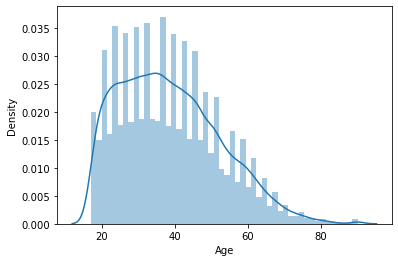

In [9]:

print("The count of Unique value",df['Age'].nunique())
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age'>

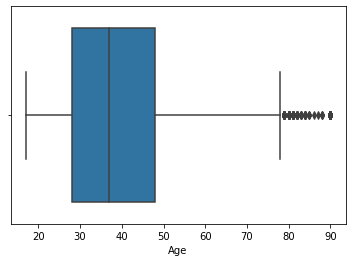

In [10]:
#we see some skewness in the column 'Age' that means we have some Outliers prsent in the dataset.
sns.boxplot(df['Age'])

__These outliers need to be treated in the project__<br>
__Exploring 'Workclass' column__

In [11]:
print("The count of Unique value",df['Workclass'].nunique())
df['Workclass'].value_counts()

The count of Unique value 9


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

__we replaced ? with private__



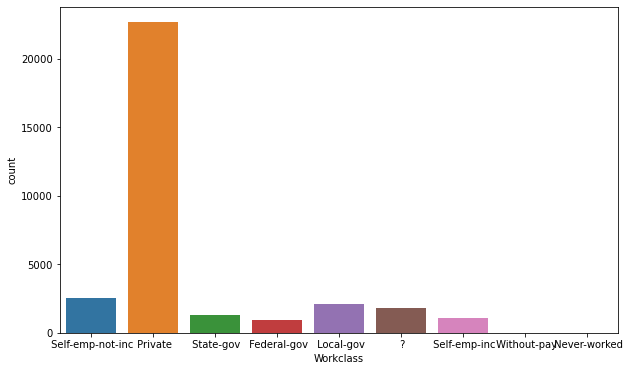

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['Workclass'])
plt.show()

__From aboove countplot we can clearly see that private workings count are highest.__<br>
__Exploring 'Fnlwgt' column__

In [13]:
df['Fnlwgt'].describe()

count    3.253600e+04
mean     1.897843e+05
std      1.055563e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783560e+05
75%      2.369932e+05
max      1.484705e+06
Name: Fnlwgt, dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

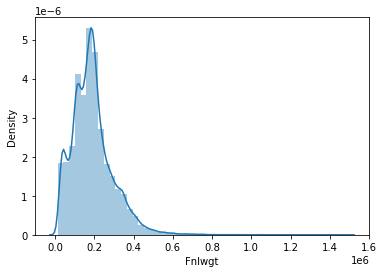

In [14]:
sns.distplot(df['Fnlwgt'])

Highly right skew column, lets check with the boxplot to confirm the outliers.

<AxesSubplot:xlabel='Fnlwgt'>

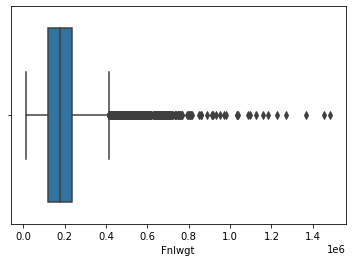

In [15]:
sns.boxplot(df['Fnlwgt'])

Yes Outliers are present in the dataset, we will handle thses outliers later in the project.<br>
__Exploring 'Education' column__

In [16]:
df['Education'].nunique()

16

In [17]:
df['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

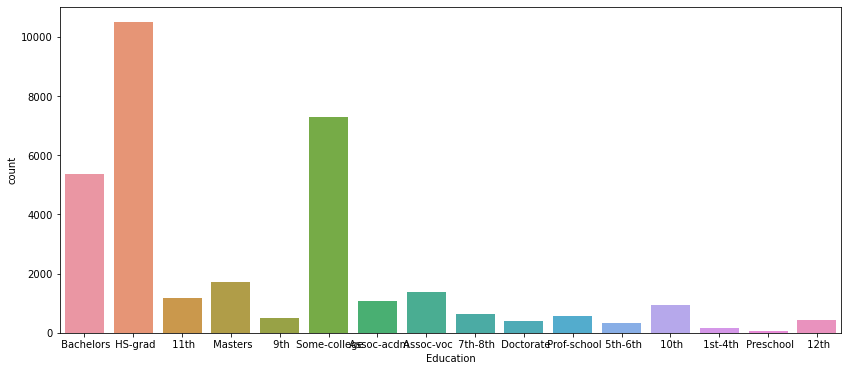

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(df['Education'])
plt.show()

__The count of highschool gradutes are the highest and preschool are the lowest in this column__<br>
__Exploring 'Education_num' columns__

In [19]:
df['Education_num'].nunique()

16

In [20]:
df['Education_num'].value_counts()

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

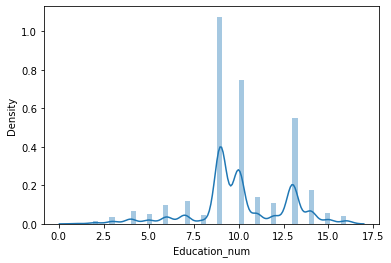

In [21]:
sns.distplot(df['Education_num'])

<AxesSubplot:xlabel='Education_num'>

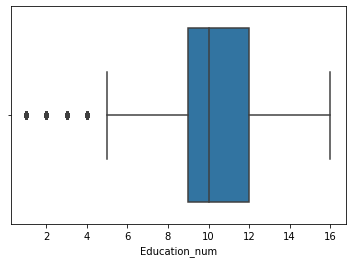

In [22]:
sns.boxplot(df['Education_num'])

Outliers present in this column, which we handle later.<br>
__Exploring Marital_status  column__

In [23]:
df['Marital_status'].nunique()

7

In [24]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

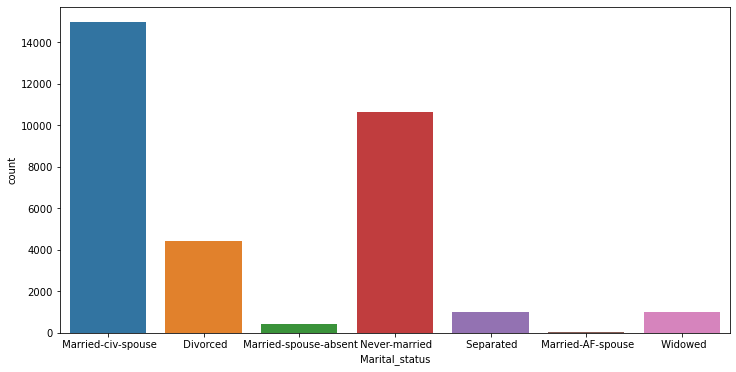

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(df['Marital_status'])
plt.show()

__From the above counplot its clear that Married-civ-spouse counts are the highest and  Married-AF-spouse are the lowest__<br>
__Exploring Occupation' Columns__ <br>  
        'Native_country'

In [25]:
print("COunt of unique value of  Occupation column",df['Occupation'].nunique())

COunt of unique value of  Occupation column 15


In [26]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

__There is a profession with ? , might be unkown, or not filled during survey. We will replace it with the proffesion Prof-speciality__

In [27]:
df['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

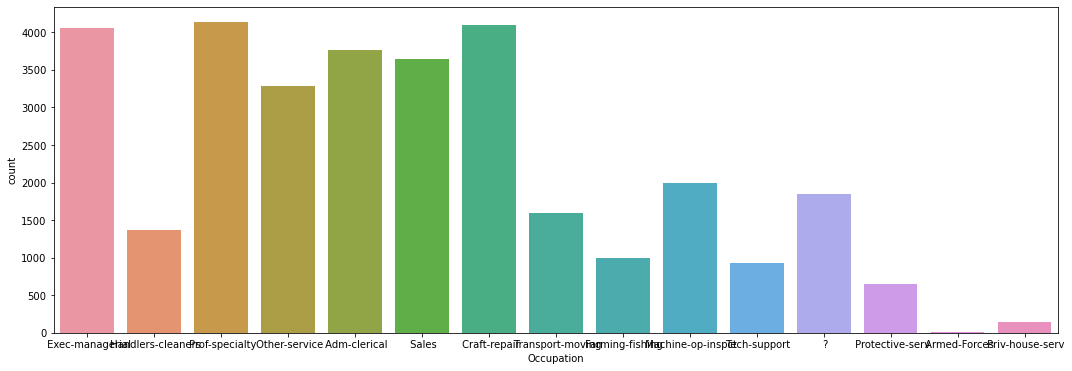

In [28]:
#countplot
plt.figure(figsize=(18,6))
sns.countplot(df['Occupation'])
plt.show()

__The count of Prof-specialty  are the highest and count of the Armed-Forces are the lowest__<br>

<br>

__Replacing ? with the proffesion Prof-speciality__

In [31]:
df['Occupation']=df['Occupation'].str.replace('?','Prof-specialty')


In [32]:
df['Occupation'].value_counts()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

__Exploring 'Relationship' column__

In [33]:
print("Count of unique value of  Occupation column",df['Relationship'].nunique())

Count of unique value of  Occupation column 6


In [34]:
df['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

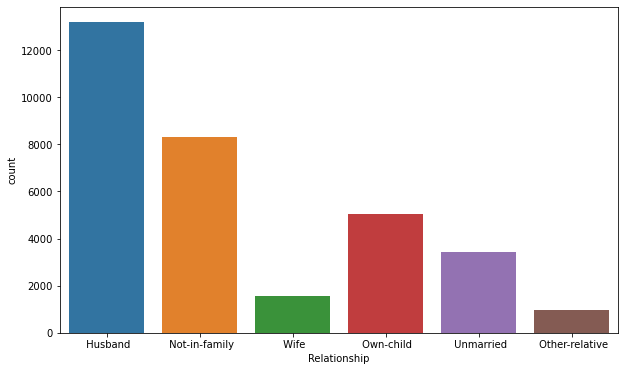

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(df['Relationship'])
plt.show()

__The count of Husband are the highest and count of other relative are the lowest__<br>
__Exploring 'Race' column__

In [36]:
print("Count of unique value of  Race column",df['Race'].nunique())

Count of unique value of  Race column 5


In [37]:
df['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

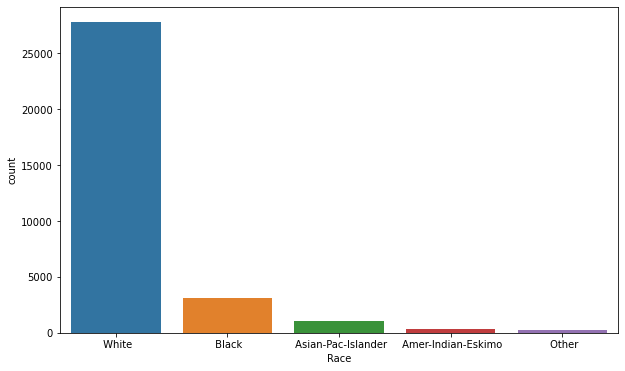

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['Race'])
plt.show()

__White people are the highest in number other than any other category__<br>
__Exploring 'Sex' column__

In [39]:
print("Count of unique value of  Sex column",df['Sex'].nunique())

Count of unique value of  Sex column 2


In [40]:
df['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

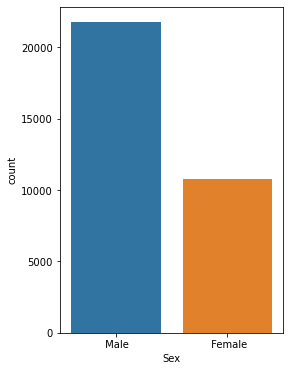

In [41]:
plt.figure(figsize=(4,6))
sns.countplot(df['Sex'])
plt.show()

__The number of males are more than Female ctaegory__<br>
__Exploring 'Capital_gain' column__

In [42]:
df['Capital_gain'].describe()

count    32536.000000
mean      1078.410069
std       7388.068465
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_gain, dtype: float64

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

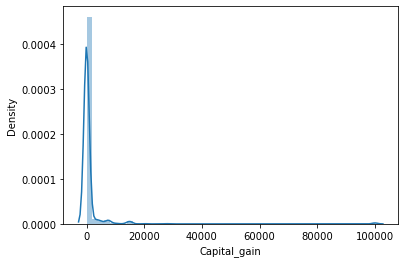

In [43]:
sns.distplot(df['Capital_gain'])

__Highly right skewed column lets check for outliers using boxplot__

<AxesSubplot:xlabel='Capital_gain'>

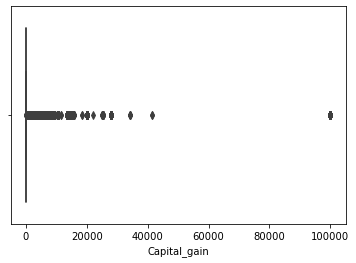

In [44]:
sns.boxplot(df['Capital_gain'])

__Yes Outliers are present in the dataset, we will handle thses outliers later in the project.__<br>
__Exploring 'Capital_loss' column__

In [45]:
df['Capital_loss'].describe()

count    32536.000000
mean        87.370912
std        403.107737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital_loss, dtype: float64

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

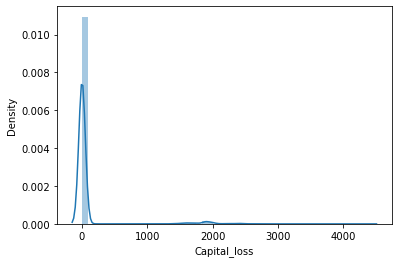

In [46]:
sns.distplot(df['Capital_loss'])

__Highly right skewed column lets check for outliers using boxplot__

<AxesSubplot:xlabel='Capital_loss'>

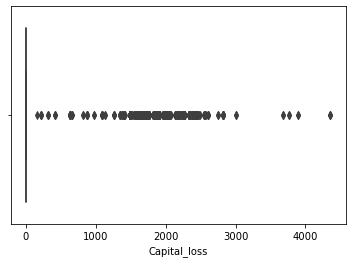

In [47]:
sns.boxplot(df['Capital_loss'])

__Yes Outliers are present in the dataset, we will handle thses outliers later in the project.__<br>
__Exploring 'Hours_per_week' column__

In [48]:
df['Hours_per_week'].describe()

count    32536.000000
mean        40.440343
std         12.347079
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

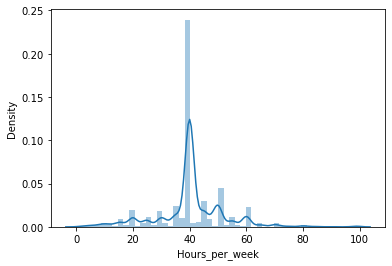

In [49]:
sns.distplot(df['Hours_per_week'])

<AxesSubplot:xlabel='Hours_per_week'>

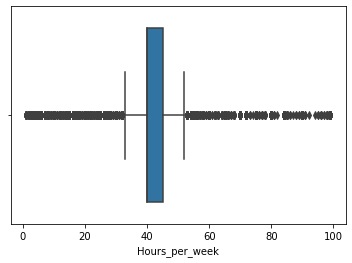

In [50]:
sns.boxplot(df['Hours_per_week'])

__Yes Outliers are present in the dataset, we will handle thses outliers later in the project.__<br>
__Exploring 'Native_country' column.__

In [51]:
df['Native_country'].nunique()

42

In [52]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

__There is a missing country name ? , let us replace it with the median, i.e US ,as we can't drop 500 rows , its better to replace instead__

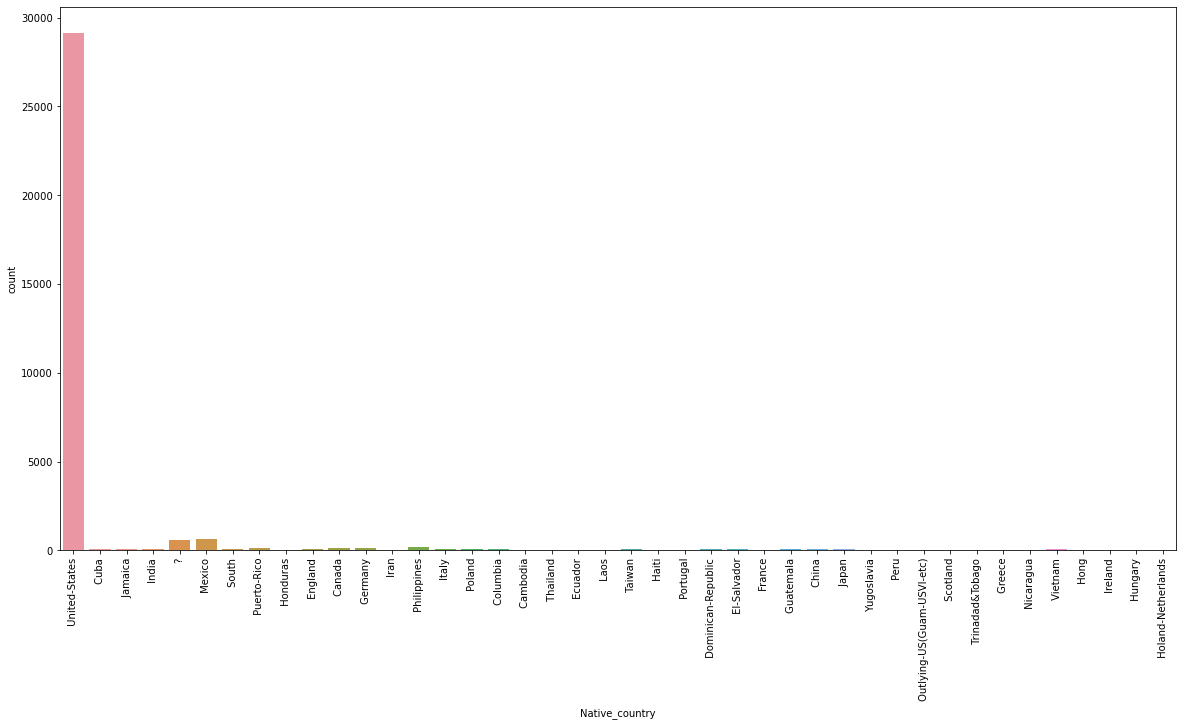

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

__The counts of United states are the highest compared to any other country__
<br>
__Replacing the ? with United-States__


In [54]:
df['Native_country']=df['Native_country'].str.replace('?','United-States')


In [55]:
df['Native_country'].value_counts()

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

__Exploring Label column__

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

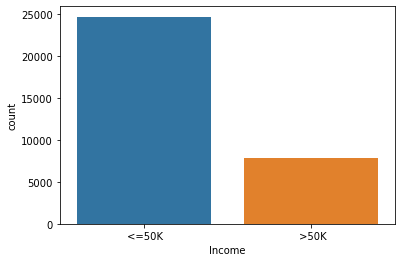

In [56]:
print(df['Income'].value_counts())
sns.countplot(df['Income'])

__We can see data contains more of income having <=50k , the other is less, i.e data is imbalanced we need to balance the dataset__<br>

Let us see, how different columns are related to Target





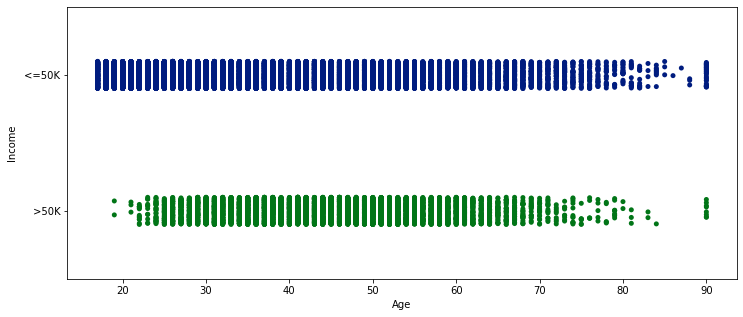

In [57]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Age', y = 'Income', data=df)
plt.show()

In the above strip plot we can see that young people hardly have income more than 50K.



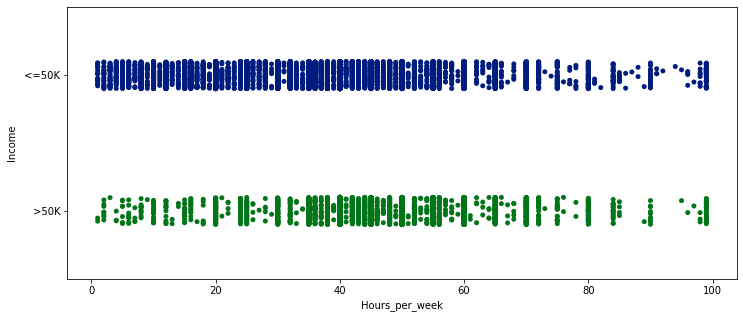

In [58]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

In the above strip plot we can see that people who have income less than or equal to 50K put in more hours per week as compared to the one's who earn more than 50K as income.

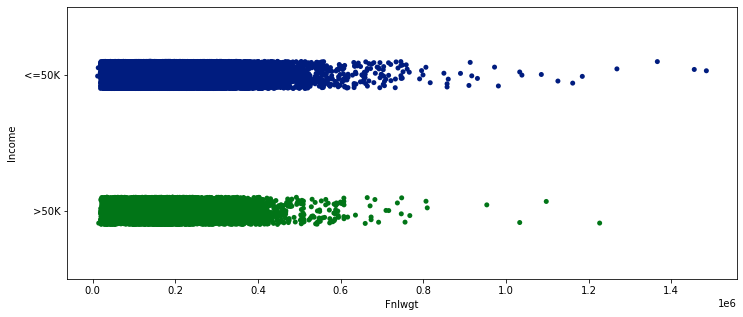

In [59]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()

 the above strip plot we can see that the final weight has data coverage on a higher scale for people in the <=50K income bracket as compared to the people in >50K income bracket.

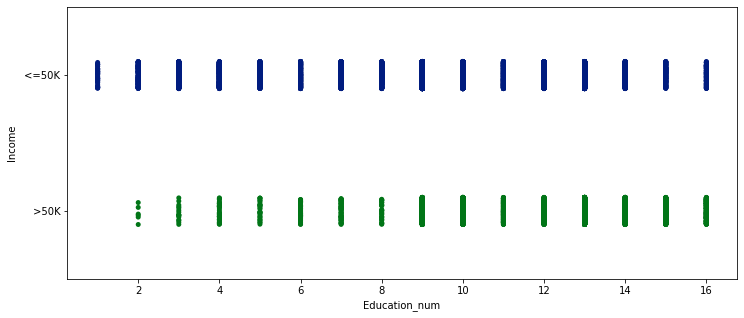

In [60]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Education_num', y = 'Income', data=df)
plt.show()


In the above strip plot we can see that the lower education number is almost negligibe for people with income >50K and it therefore emphasizes on the importance of education too.



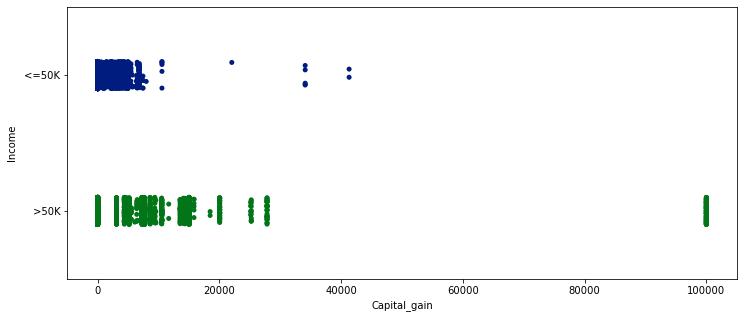

In [61]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_gain', y = 'Income', data=df)
plt.show()

In the above strip plot we can see that the capital gain is on a higher scale for people with income >50K



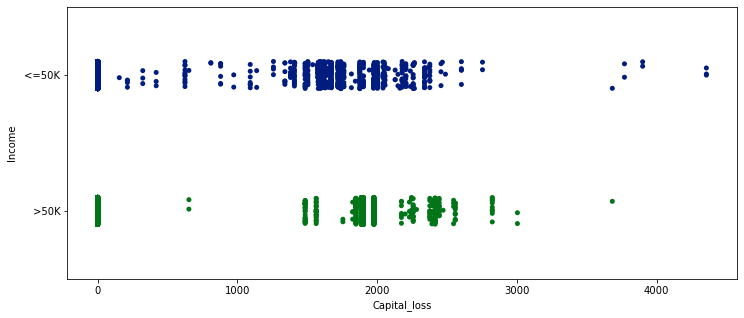

In [62]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_loss', y = 'Income', data=df)
plt.show()

In the above strip plot we can see that the capital loss for people with income >50K is considerably less than people with income <=50K



Text(0, 0.5, 'Percentage of People')

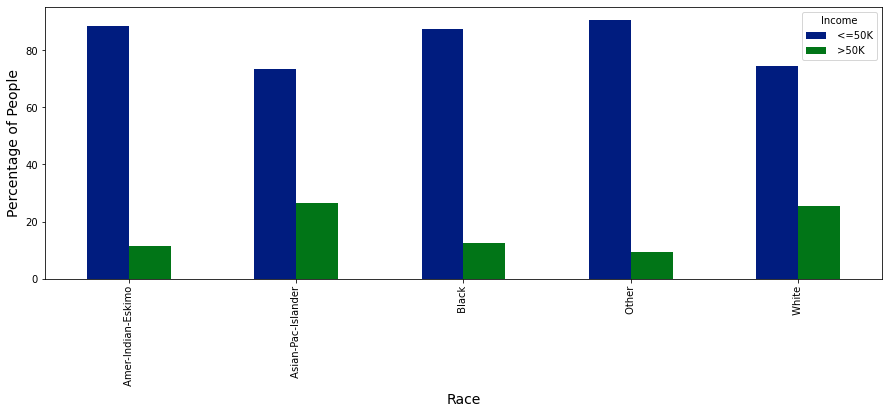

In [63]:
tbl = pd.crosstab(df['Race'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=False,figsize=(15,5))
plt.xlabel('Race', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us different ethenicity race group folks and the income variations between them.



Text(0, 0.5, 'Percentage of People')

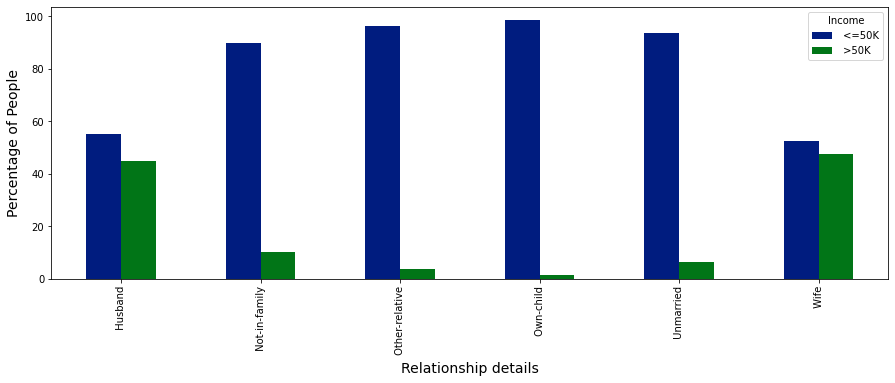

In [64]:
tbl = pd.crosstab(df['Relationship'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',figsize=(15,5))
plt.xlabel('Relationship details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us the difference in income details for people in different relationship status. People who are earning >50K are mostly from the relationship status husband or wife.

Text(0, 0.5, 'Percentage of People')

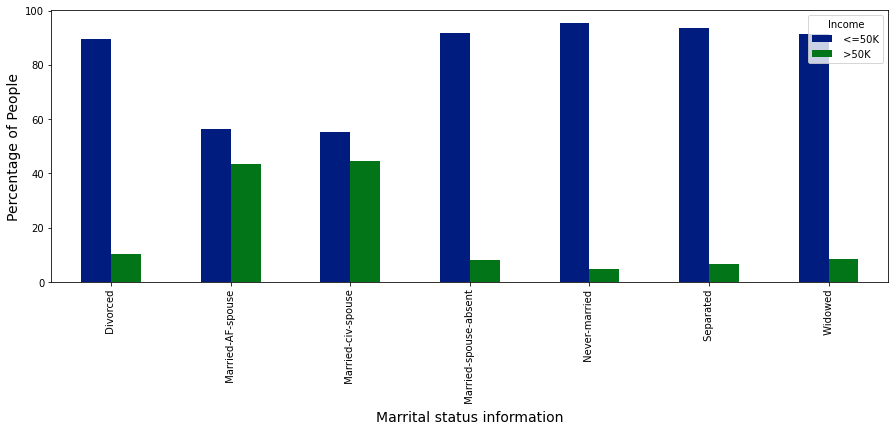

In [65]:
tbl = pd.crosstab(df['Marital_status'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',figsize=(15,5))
plt.xlabel('Marrital status information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us the marrital status of people who have income either <=50K or >50K.



Text(0, 0.5, 'Percentage of People')

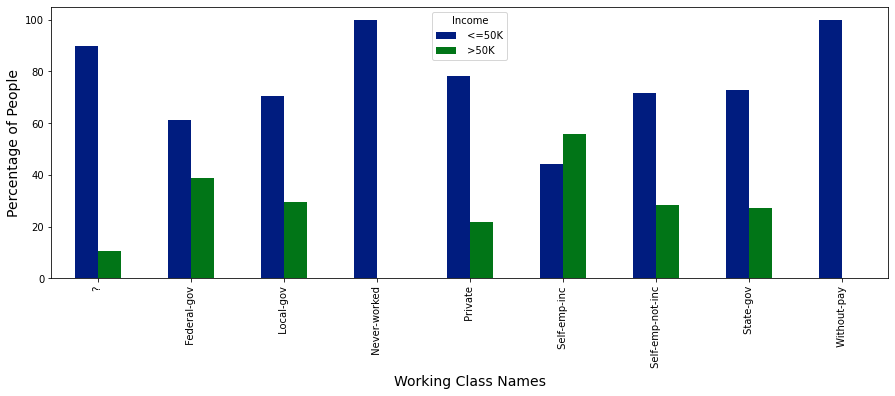

In [66]:
tbl = pd.crosstab(df['Workclass'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',figsize=(15,5))
plt.xlabel('Working Class Names', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us the working class information and people who have never worked or are sitting without pay obviously come under <=50K income bracket while mostly people who are self employed or own a business are able to make an income of >50K.

Text(0, 0.5, 'Percentage of People')

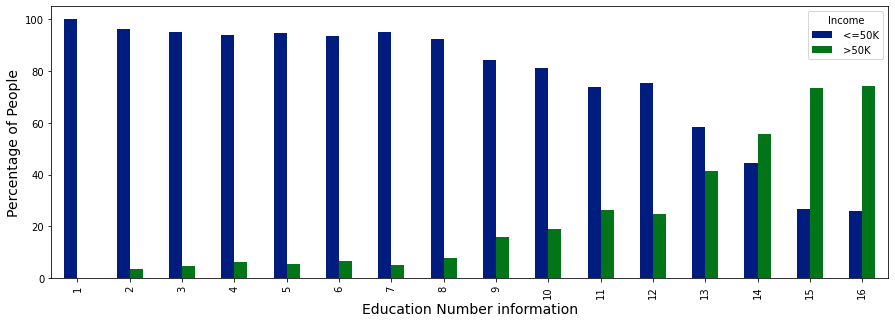

In [67]:
tbl = pd.crosstab(df['Education_num'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',figsize=(15,5))
plt.xlabel('Education Number information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us the education number scale which indicated that to earn an income of >50K you need to have a higher educational number emphasizing the importance on the educational front.

Text(0, 0.5, 'Percentage of People')

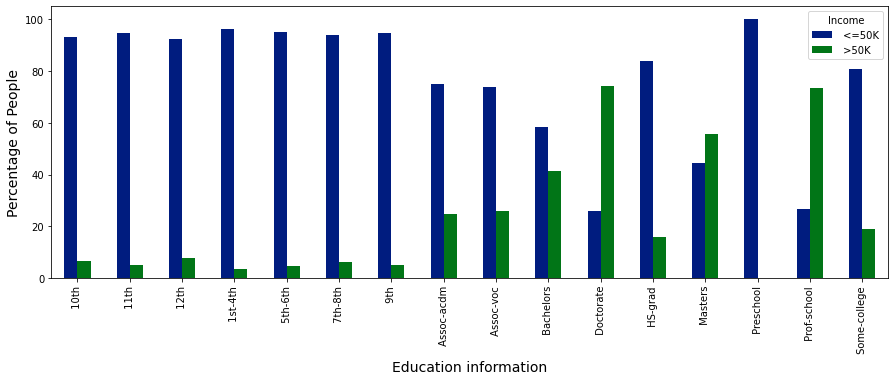

In [68]:
tbl = pd.crosstab(df['Education'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',figsize=(15,5))
plt.xlabel('Education information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us the different education types for people and their income scale. It looks like people with >50K income have a qualification in doctorate, masters and professional school.

Text(0, 0.5, 'Percentage of People')

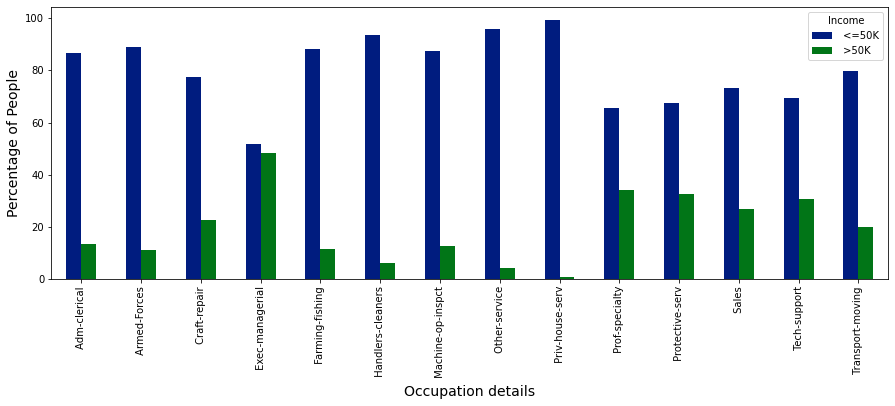

In [69]:
tbl = pd.crosstab(df['Occupation'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',figsize=(15,5))
plt.xlabel('Occupation details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us all the occupation information for people and to earn an income of >50K the designations which help are executive managerial position, professional speciality position, protective services, technical support position and sales positions.

Text(0, 0.5, 'Percentage of People')

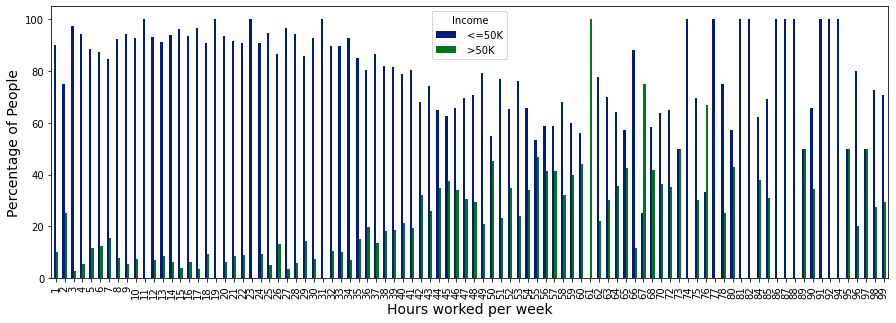

In [70]:
tbl = pd.crosstab(df['Hours_per_week'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',figsize=(15,5))
plt.xlabel('Hours worked per week', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

The above cross tab bar plot shows us that people with >50K income mostly work 61 hours per week or range from 50-80 hours per week mostly.



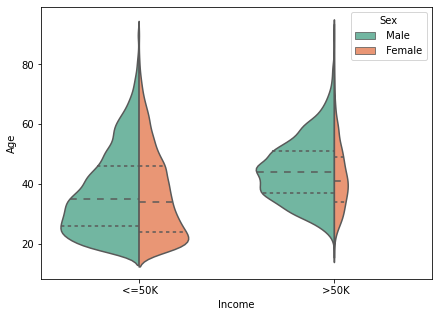

In [71]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Above violin plot shows us that male in any age group and income group have a higher number than their female counterparts.



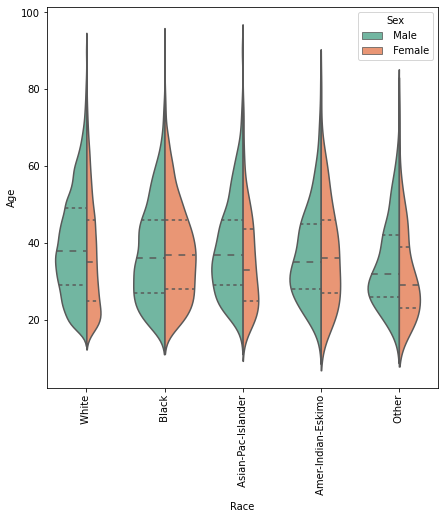

In [72]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that female with black ethinicity of any age group is higher than the other ethinicity group females.



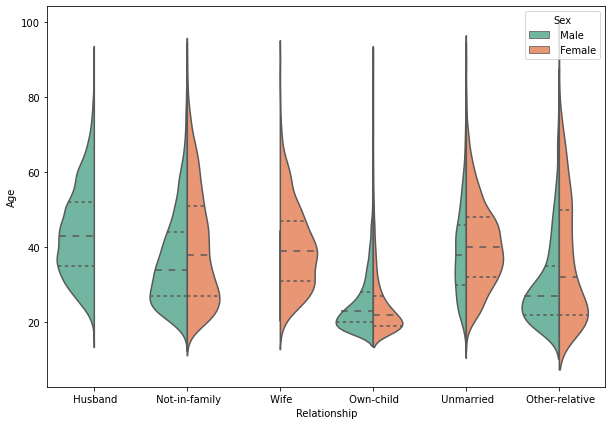

In [73]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Relationship", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Above violin plot shows us that people in the own child relationship age from 10-40. Also we have female who are unmarried more than the male counter parts.

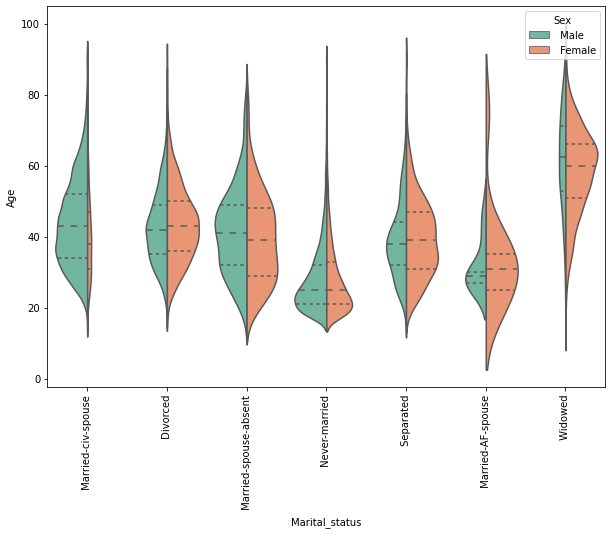

In [74]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Marital_status", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that the marital status as married spouse have a higher number in male than in female and people who are widowed have a higher number in females as compared to the males.

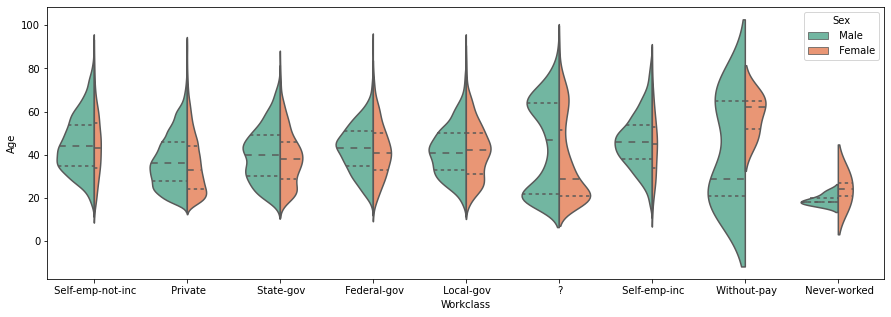

In [75]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Above violin plot shows us that male cover most of the working class sectors in each category as compared to the females.



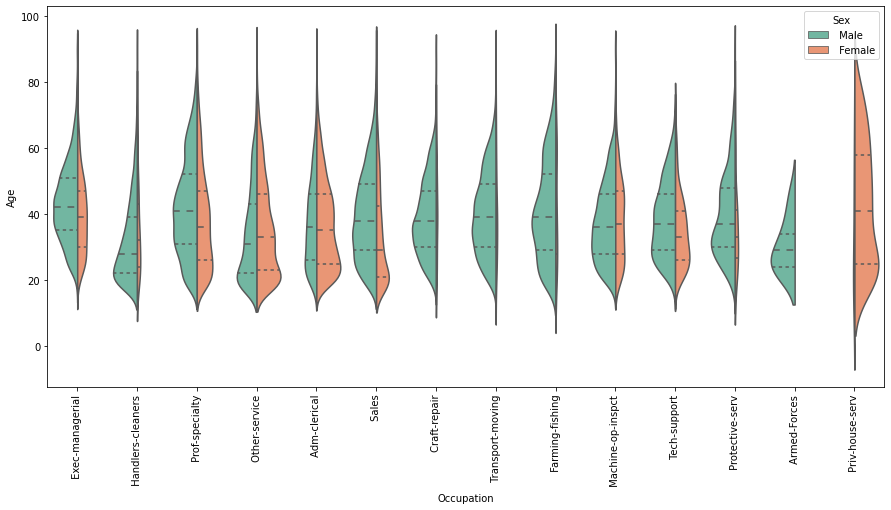

In [76]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that the designation of private house services has more number of female mostly from the 20-60 age group while occupations such as craft repair, transport moving, farming/fishing, protective/security service and armed forces have a larger number of data coverage for males.

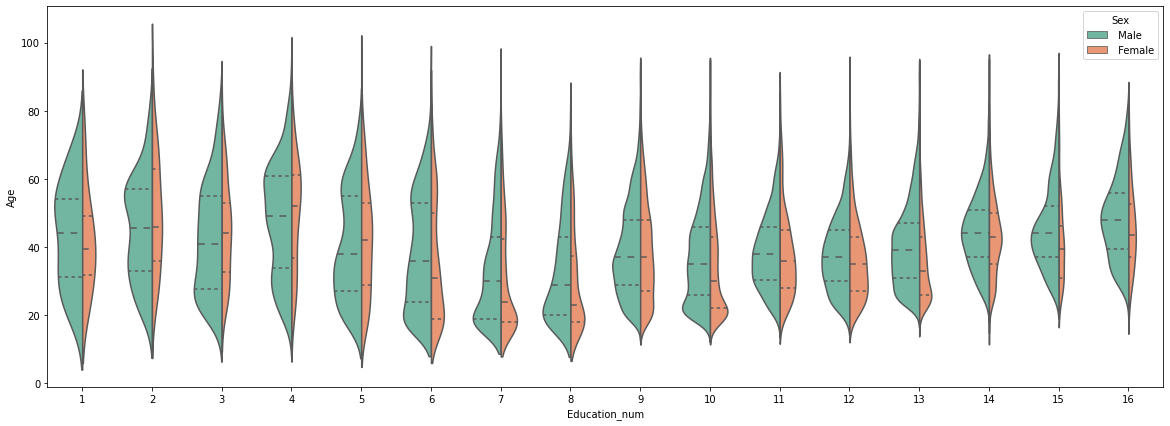

In [77]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Above violin plot shows us that males in all age group have a higher education number compared to their female counter parts.



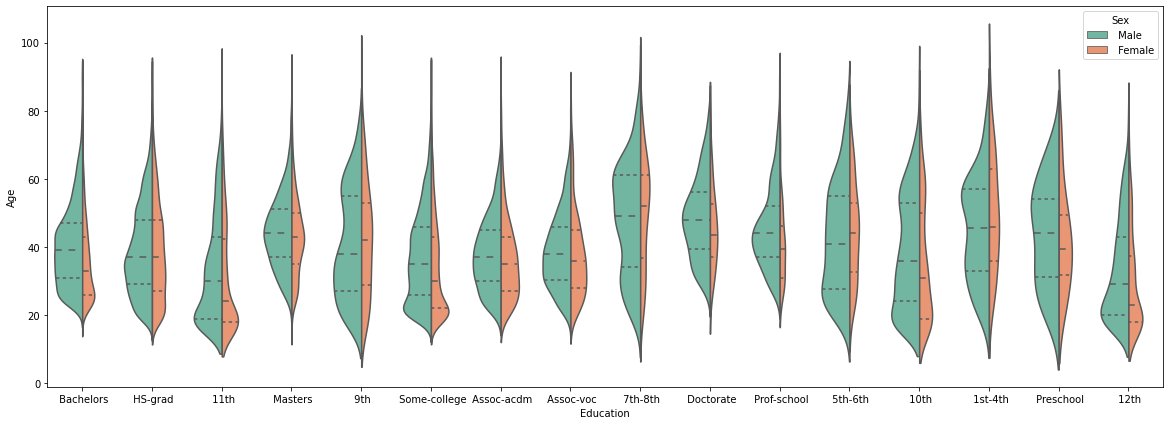

In [78]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Above violin plot shows us that just like the education number the education category sees more number of males than their female counter parts giving us a red flag on how female education is a concern.


## Let us label encode all the object columns


In [79]:
from sklearn.preprocessing import LabelEncoder


In [80]:
le=LabelEncoder()

In [81]:
cols=df.select_dtypes(include='object').columns
for i in cols:
    df[i]=le.fit_transform(df[i])
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40               4       0  
4                  40              38       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[32536 rows x 15 columns]

In [82]:
df['Workclass'].value_counts()

4    22673
6     2540
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [83]:
df['Marital_status'].value_counts()

2    14970
4    10666
0     4441
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

In [84]:
## Sucesfully converted object datatype into int datatype
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

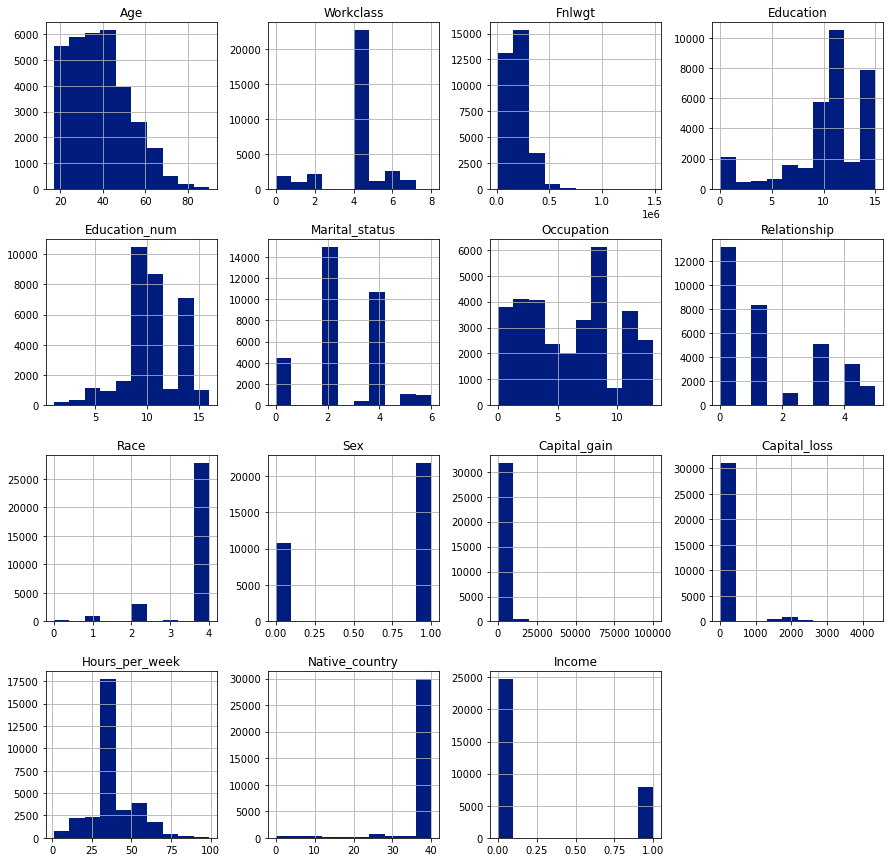

In [85]:
df.hist(figsize=(15,15))
plt.show()

I have generated a histogram for all our dataset columns after applying enconding and converting object datatype to numeric datatype values.

In [86]:
#Statistical summary
df.describe()

Age     Workclass        Fnlwgt     Education  Education_num  \
count  32536.000000  32536.000000  3.253600e+04  32536.000000   32536.000000   
mean      38.585536      3.868638  1.897843e+05     10.297547      10.081725   
std       13.638193      1.456363  1.055563e+05      3.870195       2.571622   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178315e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783560e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.369932e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       Marital_status    Occupation  Relationship          Race           Sex  \
count    32536.000000  32536.000000  32536.000000  32536.000000  32536.000000   
mean         2.611384      6.139476      1.446552      3.665816      0.669228   
std          1.506304      3.973089      1.607087      0.848858      0.470498   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      6.000000      1.000000      4.000000      1.000000   
75%          4.000000      9.000000      3.000000      4.000000      1.000000   
max          6.000000     13.000000      5.000000      4.000000      1.000000   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  \
count  32536.000000  32536.000000    32536.000000    32536.000000   
mean    1078.410069     87.370912       40.440343       36.419136   
std     7388.068465    403.107737       12.347079        6.053903   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       38.000000   
50%        0.000000      0.000000       40.000000       38.000000   
75%        0.000000      0.000000       45.000000       38.000000   
max    99999.000000   4356.000000       99.000000       40.000000   

             Income  
count  32536.000000  
mean       0.240933  
std        0.427656  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Using the describe method we can take a look at the numerical data type columns and observe the distribution of integer data amongst them. The first column shows the count/rows occupied by the columns and since all of them have the same number it indicates that there are no missing values in them. Moving on to other columns I see abnormality in the columns "Capital_gain" and "Capital_loss" that have the value 0.0 for minimum value, 25% data slot, 50% data slot and 75% data slot. However the maximum values are quite huge in number so they might be termed as some kind of outlier but when we speak statistically such kind of data is possible and therefore we will either retain them or treat them accordingly as per our requirement.

## Using Z Score to remove outliers

In [87]:
from scipy.stats import zscore

In [89]:
z = np.abs(zscore(df))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df_new.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27764, 15)
Percentage of data loss post outlier removal:  14.666830587656749


I have used the Z score method to remove the outliers and even though we are losing 14.669904106220802 % of data I am able to afford that loss considering we have a lot of rows in our datatset to be used while model building.

In [90]:
df_new.skew()

Age                0.484820
Workclass         -0.740260
Fnlwgt             0.628891
Education         -0.955798
Education_num     -0.145662
Marital_status    -0.044911
Occupation         0.013953
Relationship       0.752707
Race              -2.587279
Sex               -0.688771
Capital_gain       4.929087
Capital_loss      29.511348
Hours_per_week    -0.358610
Native_country    -5.412451
Income             1.322852
dtype: float64

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.<br>

__#Using log transformation__



In [91]:
co=['Capital_gain','Capital_loss']
for i in co:
    df_new[i]=np.log(df_new[i]+1)
    print(f'Skewness is {i}:',df_new[i].skew())

Skewness is Capital_gain: 3.1102213349812433
Skewness is Capital_loss: 25.004421643031147


skewness is reduced



## Correlation using a Heatmap

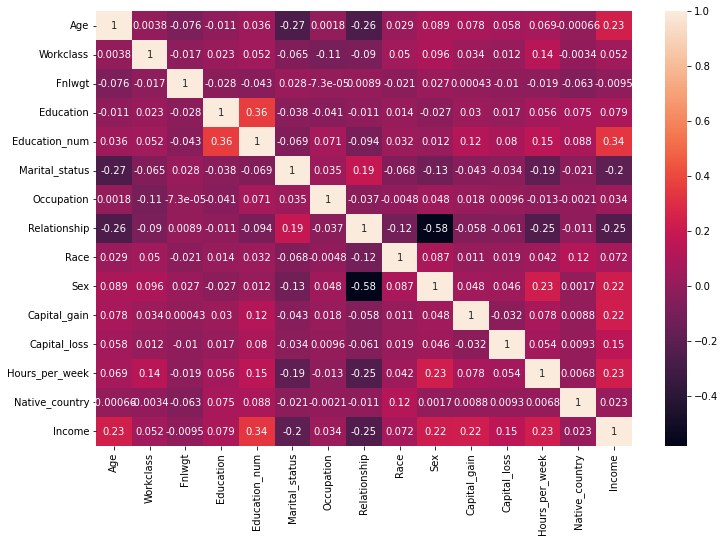

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns.


## Correlation Bar Plot comparing features with our label

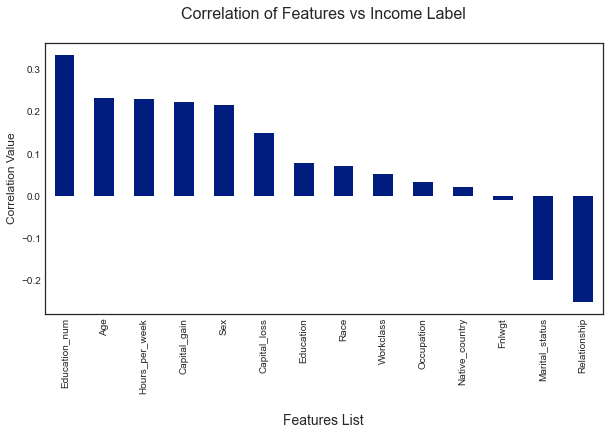

In [93]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture on positive and negative correlation columns we have generated this bar plot and we see that columns relationship and marital status are the only one's negatively correlated rest all the other feature columns are positively correlated with our label column.



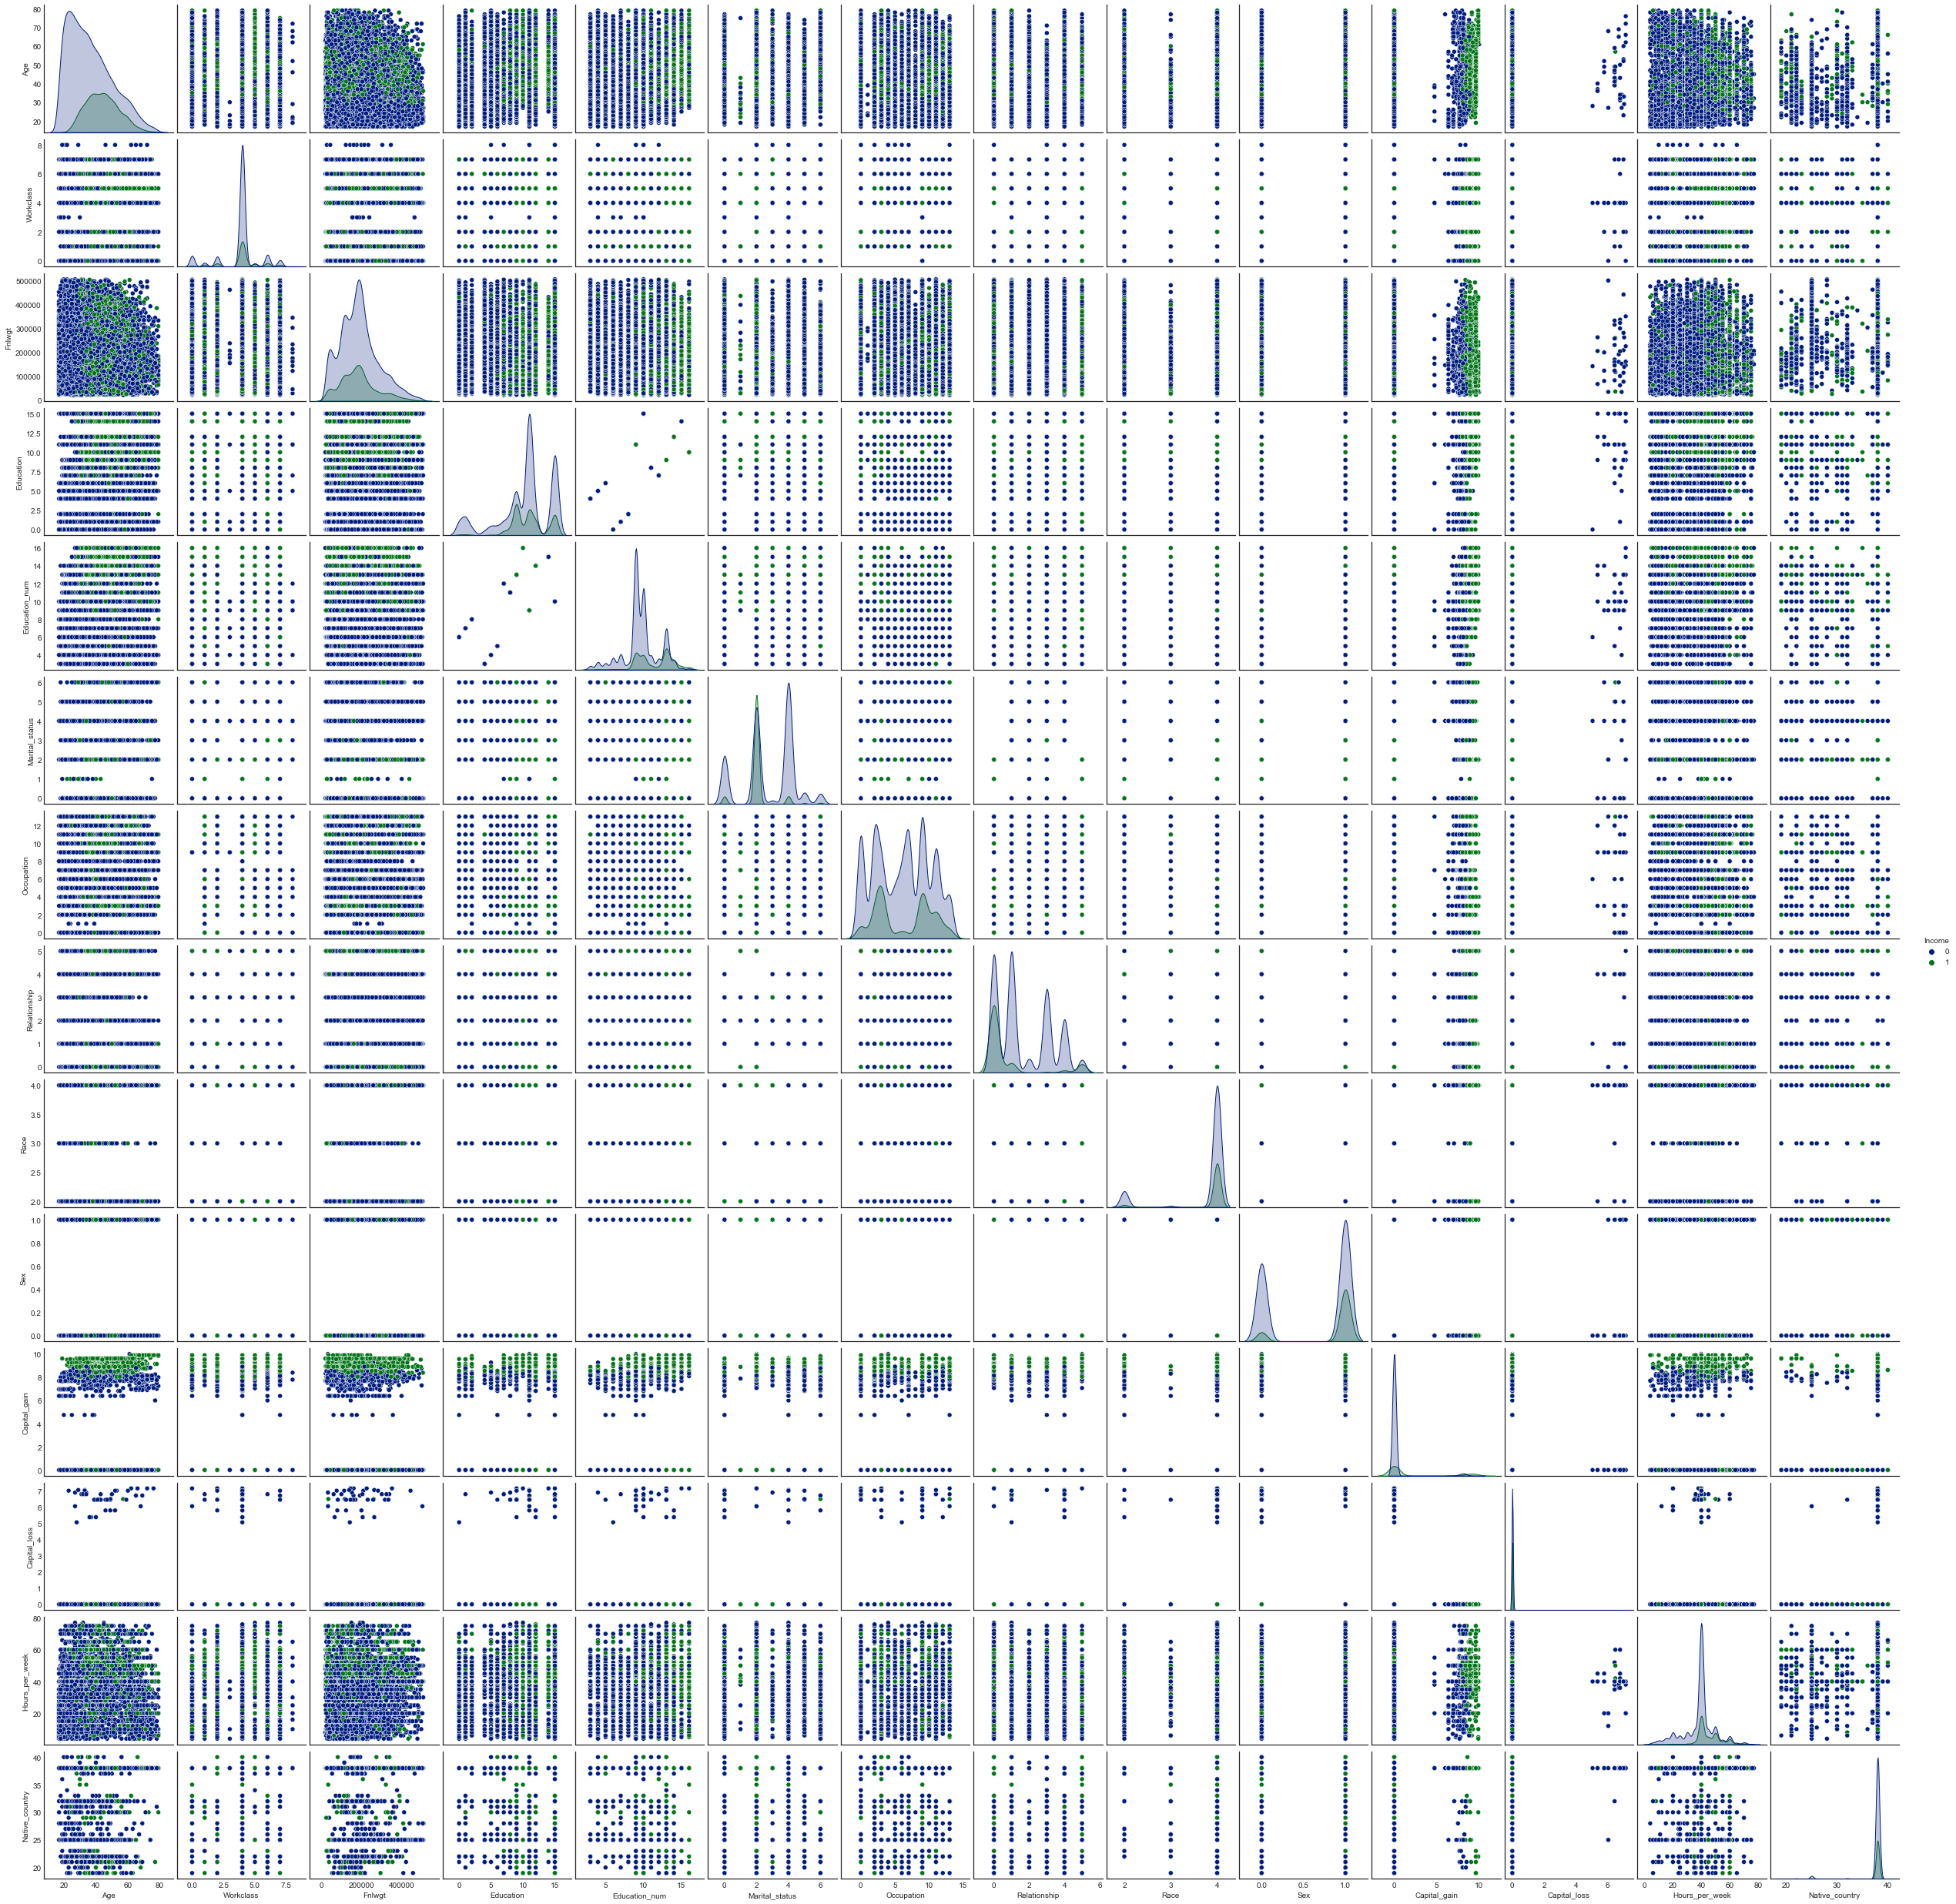

In [96]:
sns.pairplot(df_new,hue='Income')


## Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [94]:
x = df_new.drop('Income', axis=1)
y = df_new['Income']

In [95]:
print('x:',x.shape)
print('y:',y.shape)

x: (27764, 14)
y: (27764,)


## Resolving the class imbalance issue in our label column

In [97]:
y.value_counts()

0    21540
1     6224
Name: Income, dtype: int64

In [98]:
from imblearn.over_sampling import SMOTE


In [99]:
sm=SMOTE()

In [100]:
x,y = sm.fit_resample(x,y)


In [101]:
y.value_counts()

0    21540
1    21540
Name: Income, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.<br>

## Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler


In [105]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.82276035,  1.61882489, -1.09013506, ..., -0.0345926 ,
        -2.79197268,  0.17902547],
       [-0.16679165,  0.13950206,  0.32330304, ..., -0.0345926 ,
        -0.15075143,  0.17902547],
       [ 1.07014835,  0.13950206,  0.5270385 , ..., -0.0345926 ,
        -0.15075143,  0.17902547],
       ...,
       [-0.16679165,  0.13950206, -0.59602184, ..., -0.0345926 ,
         0.53400963,  0.17902547],
       [-0.33171699,  0.87916348, -1.2578016 , ..., -0.0345926 ,
         0.43618662,  0.17902547],
       [ 1.81231235, -1.33982076,  0.25123997, ..., -0.0345926 ,
         1.41441671,  0.17902547]])

## Finding the best random state


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score



In [108]:
lr=LogisticRegression()
rs=0
sc=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>sc:
        sc=acc
        rs=i
print(f'Best random state: {rs} with accuracy score: {sc}')

Best random state: 944 with accuracy score: 0.7811513463324048


Great so with the help of random state selection process we have found our lucky number to be "944" amongst 1-1000 range.

In [109]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=944)

In [112]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Machine Learning Model for Classification with Evaluation Metrics

In [114]:
def classify(model, X, y):
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))
    print("Accuracy Score:", acc_score)
    
    
    #confusion matrix:
    print('confusion matrix:\n',confusion_matrix(y_test,pred))
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

## Logistic Regression


In [115]:
model=LogisticRegression()
classify(model, X, y)

Accuracy Score: 0.7811513463324048
confusion matrix:
 [[4027 1271]
 [1086 4386]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      5298
           1       0.78      0.80      0.79      5472

    accuracy                           0.78     10770
   macro avg       0.78      0.78      0.78     10770
weighted avg       0.78      0.78      0.78     10770

Cross Validation Score: 0.7691039925719592

Accuracy Score - Cross Validation Score is 0.012047353760445634


## DecisionTreeClassifier()

In [116]:
model=DecisionTreeClassifier()
classify(model, X, y)

Accuracy Score: 0.8608170844939648
confusion matrix:
 [[4540  758]
 [ 741 4731]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5298
           1       0.86      0.86      0.86      5472

    accuracy                           0.86     10770
   macro avg       0.86      0.86      0.86     10770
weighted avg       0.86      0.86      0.86     10770

Cross Validation Score: 0.8451717734447539

Accuracy Score - Cross Validation Score is 0.015645311049210853


## RandomForestClassifier

In [123]:
model=RandomForestClassifier()
classify(model, X, y)

Accuracy Score: 0.8968430826369546
confusion matrix:
 [[4750  548]
 [ 563 4909]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      5298
           1       0.90      0.90      0.90      5472

    accuracy                           0.90     10770
   macro avg       0.90      0.90      0.90     10770
weighted avg       0.90      0.90      0.90     10770

Cross Validation Score: 0.8809192200557103

Accuracy Score - Cross Validation Score is 0.01592386258124423


## KNeighborsClassifier

In [121]:
model=KNeighborsClassifier()
classify(model, X, y)

Accuracy Score: 0.8590529247910863
confusion matrix:
 [[4470  828]
 [ 690 4782]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      5298
           1       0.85      0.87      0.86      5472

    accuracy                           0.86     10770
   macro avg       0.86      0.86      0.86     10770
weighted avg       0.86      0.86      0.86     10770

Cross Validation Score: 0.849535747446611

Accuracy Score - Cross Validation Score is 0.009517177344475325


## SVC

In [120]:
model=SVC()
classify(model, X, y)

Accuracy Score: 0.8592386258124419
confusion matrix:
 [[4364  934]
 [ 582 4890]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      5298
           1       0.84      0.89      0.87      5472

    accuracy                           0.86     10770
   macro avg       0.86      0.86      0.86     10770
weighted avg       0.86      0.86      0.86     10770

Cross Validation Score: 0.8454735376044568

Accuracy Score - Cross Validation Score is 0.013765088207985166


__From above we can see, KNeighborsClassifier the best model with least difference between CV score and F1 score.__ 

In [126]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predn=knn.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,predn))
print("Confusion Matrix\n",confusion_matrix(y_test,predn))
print("Classification Report:\n",classification_report(y_test,predn))


Accuracy Score: 0.8590529247910863
Confusion Matrix
 [[4470  828]
 [ 690 4782]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      5298
           1       0.85      0.87      0.86      5472

    accuracy                           0.86     10770
   macro avg       0.86      0.86      0.86     10770
weighted avg       0.86      0.86      0.86     10770



## Hyper parameter tuning on the best Classification ML Model

In [129]:
from sklearn.model_selection import GridSearchCV


In [130]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [131]:
grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [132]:
grid.fit(x_train,y_train)

print('score: ',grid.best_score_)
print('\nbest estimators:',grid.best_estimator_)
print('\nbest parameters:',grid.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
score:  0.8612503868771277

best estimators: KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [133]:
knn_final=KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
knn_final.fit(x_train,y_train)
predknn=knn_final.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,predknn))
print("Confusion Matrix\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))



Accuracy Score: 0.8787372330547818
Confusion Matrix
 [[4626  672]
 [ 634 4838]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      5298
           1       0.88      0.88      0.88      5472

    accuracy                           0.88     10770
   macro avg       0.88      0.88      0.88     10770
weighted avg       0.88      0.88      0.88     10770



__Great our score incresed from 0.859 to 0.878__
<br>
## AUC ROC Curve

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics


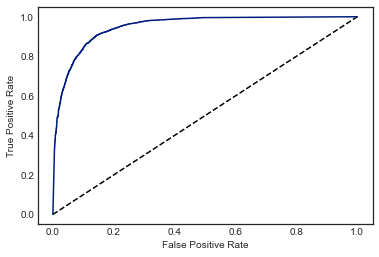

Score: 0.8786485548998959


In [138]:
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=knn_final.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,knn_final.predict(x_test))
print('Score:',auc_score)

## Confusion Matrix

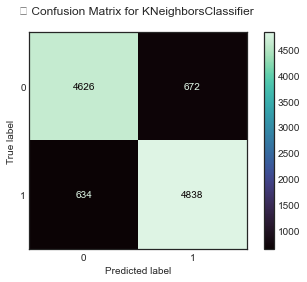

In [144]:
class_names = df_new.columns
metrics.plot_confusion_matrix(knn_final.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for KNeighborsClassifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes)

## Saving the model

In [145]:
import pickle

In [146]:
filename='Census income.pkl'

In [147]:
pickle.dump(knn_final,open(filename,'wb'))

In [149]:
#conclusion
loaded_model=pickle.load(open('Census income.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.87372330547818


In [150]:
#Conslusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predcited','Orignal'])
conclusion

0      1      2      3      4      5      6      7      8      \
Predcited      1      1      1      0      1      0      1      1      1   
Orignal        0      0      1      1      1      1      1      1      1   

           9      ...  10760  10761  10762  10763  10764  10765  10766  10767  \
Predcited      1  ...      1      0      1      0      0      0      0      1   
Orignal        1  ...      1      1      0      0      1      0      1      1   

           10768  10769  
Predcited      1      1  
Orignal        1      1  

[2 rows x 10770 columns]

## Steps: I Followed in the above Dataset.

- Imported the required libraries

- loaded the dataset and checked for shape,datatype information, columns and checked for null /missing value(if any) and took the neccessary step

- Checked for unique values count and plot a bar of it(count plot)

- Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

- Visulise the relationship between features and label using stripplot , violin plot 

- Encoded categorical columns using encoding techniq and convreted object datatype into int datatype

- Used zscore() method to remove outliers and again checked for skewness and found skewness in dataset so used np.log() method and again chekd for skewness .

- Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated fetures( if any)

-  Plotted bar plot to undersatnd the positive and negative related fetaures to target

- Plotted pairplot as well

- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

- Balanced the label column using SMOTE technique

- Scaled the features using StandardScaler

- Found the best random_state and wrote down single function for mulitple model evaluation.

- Evaluate the different models based on score, f1score

- Calculated CV score and selected the best model which had least difference between accuracy and CV score(KneighborsClassifier).

- Hypertuned the parameter using GridsearchCV and again calculated the scores and improved the accuracy score saved the model with hypertuned parameter(KneighborsClassifier)(from 0.85 to 0.878) .

- Plotted AUC ROC curve

- printed confusion Matrix

- Saved the model using pickle library

- Compared the predicted and Original values